In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
nom=['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
X = np.array(data[nom])
Y = np.array(data['Price'].values.reshape(-1,1))

In [4]:
from sklearn import linear_model
rang=np.logspace(-10, -1, num=50, base=10.0)
coef=[]
for i in rang:
    clf = linear_model.Lasso(alpha=i, normalize=True)
    clf.fit(X,Y)
    coef.append(clf.coef_)
    
coef=np.array(coef)

In [5]:
from sklearn.model_selection import LeaveOneOut

rang=np.logspace(-10, -1, num=50, base=10.0)
coef=[]
    clf = linear_model.Lasso(alpha=i, normalize=True)
    clf.fit(X,Y)
    coef.append(clf.coef_)
    
coef=np.array(coef)

loo = LeaveOneOut()
for i in rang:
    for train, test in loo.split(X):
        xtrain, xtest =X[train],X[test]
        ytrain, ytest =Y[train],Y[test]
        clt = linear_model.Lasso(alpha=i, normalize=True)
        clt.fit(xtrain,ytrain)
        clt.score(xtest, ytest)

IndentationError: unexpected indent (<ipython-input-5-ab3012af36fb>, line 5)

Text(0, 0.5, 'Coeficientes normalizados')

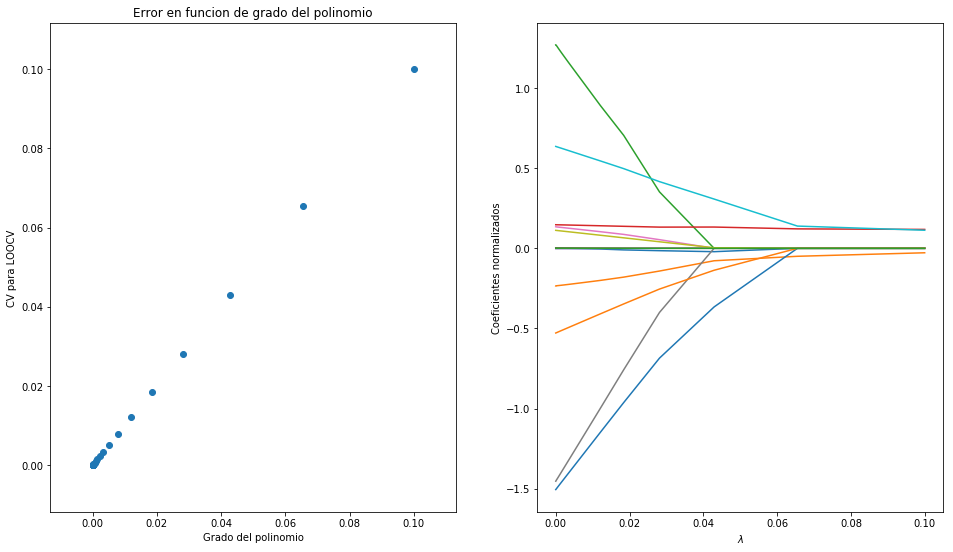

In [6]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
plt.scatter(rang, rang, label="Datos Experimentales")
plt.xlabel("Grado del polinomio")
plt.ylabel("CV para LOOCV")
plt.title("Error en funcion de grado del polinomio")

plt.subplot(1,2,2)
len=np.shape(coef)[1]
for i in range(int(len)):
    plt.plot(rang, coef[:,i])
    
plt.xlabel("$\lambda$")
plt.ylabel("Coeficientes normalizados")